# Import

In [67]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

In [23]:
# Read in the data set
df = pd.read_table('~/Desktop/Data/sdd_archive.tab', low_memory=False)

In [24]:
# Select required variables and assign to df1
df1 = df.loc[:,('pupilwt','age1115', 'sex', 'ddwbscore', 'ddwbcat', 'dgtdcan', 'dgtdamp','dgtdlsd','dgtdecs', 
                'dgtdcok', 'dgtdket', 'dgtdnox', 'dgtdleg', 'devrstm', 'devrpsy', 'devropi', 'devrcla', 'devrps', 
                'ddgany')]

# Clean Data

In [25]:
# Create functions for cleaning missing values

def CleanData(df1):
    nan_values = [-1,-8,-9] # These variables have values missing at -1,-8,-9
    df1.sex.replace(nan_values, np.nan, inplace=True)
    df1.dgtdcan.replace(nan_values, np.nan, inplace=True)
    df1.dgtdamp.replace(nan_values, np.nan, inplace=True)
    df1.dgtdlsd.replace(nan_values, np.nan, inplace=True)
    df1.dgtdecs.replace(nan_values, np.nan, inplace=True)
    df1.dgtdcok.replace(nan_values, np.nan, inplace=True)
    df1.dgtdket.replace(nan_values, np.nan, inplace=True)
    df1.dgtdnox.replace(nan_values, np.nan, inplace=True)
    df1.dgtdleg.replace(nan_values, np.nan, inplace=True)
    df1.devrstm.replace(nan_values, np.nan, inplace=True)
    df1.devrpsy.replace(nan_values, np.nan, inplace=True)
    df1.devropi.replace(nan_values, np.nan, inplace=True)
    df1.devrcla.replace(nan_values, np.nan, inplace=True)
    df1.devrps.replace(nan_values, np.nan, inplace=True)
    df1.ddgany.replace(nan_values, np.nan, inplace=True)
    
def CleanWell(df1):
    nan_values = [-8,-9,-98] # These variables have values missing at -8,-9,-98
    df1.ddwbscore.replace(nan_values, np.nan, inplace=True)
    df1.ddwbcat.replace(nan_values, np.nan, inplace=True)

In [26]:
# Run functions

CleanData(df1)
CleanWell(df1)

In [27]:
# Change NaNs to average mean
df1 = df1.fillna(df1.mean())
df1.head()

# Check datatype
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12051 entries, 0 to 12050
Data columns (total 19 columns):
pupilwt      12051 non-null float64
age1115      12051 non-null int64
sex          12051 non-null float64
ddwbscore    12051 non-null float64
ddwbcat      12051 non-null float64
dgtdcan      12051 non-null float64
dgtdamp      12051 non-null float64
dgtdlsd      12051 non-null float64
dgtdecs      12051 non-null float64
dgtdcok      12051 non-null float64
dgtdket      12051 non-null float64
dgtdnox      12051 non-null float64
dgtdleg      12051 non-null float64
devrstm      12051 non-null float64
devrpsy      12051 non-null float64
devropi      12051 non-null float64
devrcla      12051 non-null float64
devrps       12051 non-null float64
ddgany       12051 non-null float64
dtypes: float64(18), int64(1)
memory usage: 1.7 MB


In [28]:
# Change floats to int
df1 = df1.astype(int)

In [29]:
# Create functions for binary variables

#def CleanBin(df1):
    # Replace sex variables
 #   df1.sex.replace(1.0, 'male', inplace=True)
  #  df1.sex.replace(2.0, 'female', inplace=True)
    # Replace ever tried drug variables
   # df1.dgtdcan.replace(1.0, 'yes', inplace=True)
#    df1.dgtdcan.replace(2.0, 'no', inplace=True)
 #   df1.dgtdamp.replace(1.0, 'yes', inplace=True)
  #  df1.dgtdamp.replace(2.0, 'no', inplace=True)
   # df1.dgtdlsd.replace(1.0, 'yes', inplace=True)
#    df1.dgtdlsd.replace(2.0, 'no', inplace=True)
 #   df1.dgtdecs.replace(1.0, 'yes', inplace=True)
  #  df1.dgtdecs.replace(2.0, 'no', inplace=True)
   # df1.dgtdcok.replace(1.0, 'yes', inplace=True)
#    df1.dgtdcok.replace(2.0, 'no', inplace=True)
 #   df1.dgtdket.replace(1.0, 'yes', inplace=True)
  #  df1.dgtdket.replace(2.0, 'no', inplace=True)
   # df1.dgtdnox.replace(1.0, 'yes', inplace=True)
#    df1.dgtdnox.replace(2.0, 'no', inplace=True)
 #   df1.dgtdleg.replace(1.0, 'yes', inplace=True)
  #  df1.dgtdleg.replace(2.0, 'no', inplace=True)
    # Replace ever tried drug group variables
   # df1.devrstm.replace(1.0, 'yes', inplace=True)
#    df1.devrstm.replace(2.0, 'no', inplace=True)
 #   df1.devrpsy.replace(1.0, 'yes', inplace=True)
  #  df1.devrpsy.replace(2.0, 'no', inplace=True)
   # df1.devropi.replace(1.0, 'yes', inplace=True)
#    df1.devropi.replace(2.0, 'no', inplace=True)
 #   df1.devrcla.replace(1.0, 'yes', inplace=True)
  #  df1.devrcla.replace(2.0, 'no', inplace=True)
   # df1.devrps.replace(1.0, 'yes', inplace=True)
#    df1.devrps.replace(2.0, 'no', inplace=True)
    # Replace ever tried any drug
 #   df1.ddgany.replace(1.0, 'yes', inplace=True)
  #  df1.ddgany.replace(2.0, 'no', inplace=True)
    # Replace wellbeing category
   # df1.ddwbcat.replace(1.0, 'low wellbeing', inplace=True)
#    df1.ddwbcat.replace(2.0, 'not low wellbeing', inplace=True)
    
# Run function for binary variables
#CleanBin(df1)

# Check data
df1.head()

,pupilwt,age1115,sex,ddwbscore,ddwbcat,dgtdcan,dgtdamp,dgtdlsd,dgtdecs,dgtdcok,dgtdket,dgtdnox,dgtdleg,devrstm,devrpsy,devropi,devrcla,devrps,ddgany
0,0,12,2,17,2,2,2,2,2,2,1,1,2,2,1,2,1,2,1
1,1,12,1,19,2,2,2,2,2,2,1,2,1,2,2,2,2,1,1
2,0,14,2,20,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2
3,0,14,1,13,2,2,2,2,2,2,1,1,2,2,1,2,2,2,1
4,0,13,1,19,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2


# Descriptive Statistics

In [30]:
# Calculate descriptive statistics for wellbeing scores

wbmean = np.mean(df1.ddwbscore) # mean wellbeing score
wbvar = np.var(df1.ddwbscore) # variance
print(wbmean)
print(wbvar)

14.64351506099079
18.143103535146043


In [31]:
# Create plot to show distribution of wellbeing score
#sns.distplot(df1.ddwbscore)
#plt.title('Histogram of Wellbeing Scores')
#plt.xlabel('Wellbeing Scores')
#plt.ylabel('Estimated Density')
#plt.xticks((0,2,4,6,8,10,12,14,16,18,20))
#plt.xlim([1,20])
#plt.savefig('wellbeing_hist.jpg')
#plt.figure()

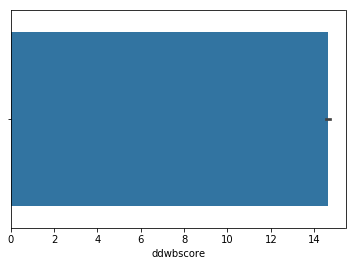

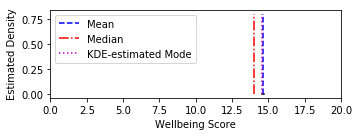

In [16]:
# Set up plot
ax = sns.barplot(df1.ddwbscore)
# Set parameters for visualising central tendency of wellbeing scores
xk,yk = ax.get_lines()[0].get_data()
mm = np.mean(df1.ddwbscore)
md = np.median(df1.ddwbscore)
mo = xk[np.argmax(yk)]

# Plot central tendency of wellbeing scores - including mean, median and KDE estimated mode
plt.figure(figsize=(5,2))
plt.plot(xk,yk,'-k')
xx = np.ones(2)
yy = np.array([0, 0.8])
plt.plot(mm*xx,yy,'--b',label='Mean')
plt.plot(md*xx,yy,'-.r',label='Median')
plt.plot(mo*xx,yy,':m',label='KDE-estimated Mode')
plt.xlabel('Wellbeing Score')
plt.ylabel('Estimated Density')
plt.xlim([0,20])
plt.legend()
plt.tight_layout()
plt.savefig('wellbeing_cent_tend.jpg')
plt.show()

<Figure size 432x288 with 0 Axes>

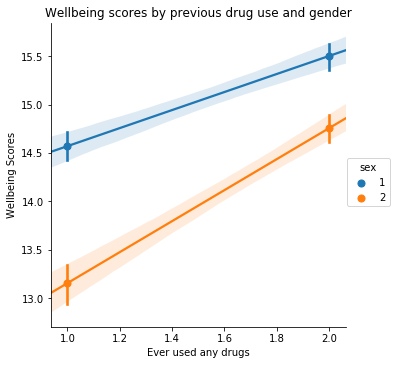

<Figure size 432x288 with 0 Axes>

In [77]:
#Correlation of wellbeing scores and drug use by gender
sns.lmplot(x="ddgany", y="ddwbscore", hue="sex", data=df1, x_estimator=np.mean);
plt.title('Wellbeing scores by previous drug use and gender')
plt.xlabel('Ever used any drugs')
plt.ylabel('Wellbeing Scores')
plt.savefig('../corr_wb_drug.jpg',format='jpg') 
plt.figure()

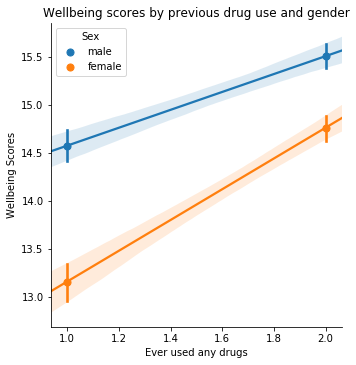

In [80]:
# Plot linear regression of wellbeing scores and drug use by gender
g = sns.lmplot(x="ddgany", y="ddwbscore", hue="sex", data=df1, x_estimator=np.mean, legend_out = False)

# Change labels of sex from 1 to male and 2 to female.
leg = g.axes.flat[0].get_legend()
new_title = 'Sex'
leg.set_title(new_title)
new_labels = ['male', 'female']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

# Set labels, save and show plot
plt.title('Wellbeing scores by previous drug use and gender')
plt.xlabel('Ever used any drugs')
plt.ylabel('Wellbeing Scores')
plt.savefig('../corr_wb_drug.jpg',format='jpg') 
plt.show()

# Exploratory Data Analysis

In [32]:
# Create matrix with variables of interest and assign to array
X = [df1.ddwbscore, df1.ddwbcat, df1.dgtdcan, df1.dgtdamp, df1.dgtdlsd, df1.dgtdecs, df1.dgtdcok, df1.dgtdket,
     df1.dgtdnox, df1.dgtdleg, df1.devrstm, df1.devrpsy, df1.devropi, df1.devrcla, df1.devrps, df1.ddgany]

In [33]:
# get sample means
xbar = np.mean(X,1)
print(xbar)

[14.64351506  1.70541864  1.78051614  1.57605178  1.49456477  1.60633972
  1.88664841  1.39673056  1.57098996  1.61638038  1.84150693  1.9073106
  1.92739192  1.81047216  1.87171189  1.60775039]


# Linear Regression

In [68]:
# Create X variable

X = [df1.dgtdcan, df1.dgtdamp, df1.dgtdlsd, df1.dgtdecs, df1.dgtdcok, df1.dgtdket, df1.dgtdnox, df1.dgtdleg]
X = np.array(X)
X = X.T
X = sm.add_constant(X)

# Create response variable - wellbeing scores
y = df1.ddwbscore

In [69]:
# Run linear regression model
linear_model=sm.OLS(y,X)
result_lin=linear_model.fit()
print(result_lin.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.040     
Dependent Variable: ddwbscore        AIC:                68647.9171
Date:               2019-01-03 15:04 BIC:                68714.4892
No. Observations:   12051            Log-Likelihood:     -34315.   
Df Model:           8                F-statistic:        63.33     
Df Residuals:       12042            Prob (F-statistic): 4.18e-102 
R-squared:          0.040            Scale:              17.424    
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const       16.4456     0.2690   61.1436   0.0000   15.9184   16.9728
x1           0.5942     0.1001    5.9383   0.0000    0.3981    0.7903
x2          -0.5645     0.0954   -5.9150   0.0000   -0.7515   -0.3774
x3          -0.7330     0.0942   -7.7815   0.0000   -0

In [70]:
# Remove insignificant variables
X = [df1.dgtdcan, df1.dgtdamp, df1.dgtdlsd, df1.dgtdecs, df1.dgtdcok, df1.dgtdket, df1.dgtdleg]
X = np.array(X)
X = X.T
X = sm.add_constant(X)

# Run second linear regression model
linear_model2=sm.OLS(y,X)
result_lin2=linear_model2.fit()
print(result_lin2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.040     
Dependent Variable: ddwbscore        AIC:                68648.9070
Date:               2019-01-03 15:05 BIC:                68708.0822
No. Observations:   12051            Log-Likelihood:     -34316.   
Df Model:           7                F-statistic:        71.94     
Df Residuals:       12043            Prob (F-statistic): 2.08e-102 
R-squared:          0.040            Scale:              17.426    
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const       16.5087     0.2665   61.9464   0.0000   15.9863   17.0311
x1           0.6129     0.0995    6.1610   0.0000    0.4179    0.8079
x2          -0.5537     0.0952   -5.8137   0.0000   -0.7403   -0.3670
x3          -0.7242     0.0941   -7.6991   0.0000   -0